<a href="https://colab.research.google.com/github/Shaymaxo/Capstone-2-Springboard/blob/main/EDA_new_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import zipfile
import os
import pandas as pd

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/Capstone1/Capstone 2 - Data Wrangling/ieee-fraud-detection_project/data/raw/Archive.zip'

# 3. Where to extract the contents
extract_path = '/content/data_extracted'
os.makedirs(extract_path, exist_ok=True)

# 4. Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 5. Optional: List the extracted files to see what’s inside
os.listdir(extract_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['train_identity.csv', 'train_transaction.csv', '__MACOSX']

In [ ]:
transaction_path = '/content/data_extracted/train_transaction.csv'
identity_path = '/content/data_extracted/train_identity.csv'

import os

print("train_transaction.csv exists:", os.path.exists(transaction_path))
print("train_identity.csv exists:", os.path.exists(identity_path))


train_transaction.csv exists: True
train_identity.csv exists: True


In [ ]:
# Load the datasets
df_transactions = pd.read_csv(transaction_path)
df_identity = pd.read_csv(identity_path)

In [ ]:
print("Transactions DataFrame:")
print(df_transactions.head())
print("\nTransactions DataFrame Info:")
print(df_transactions.info())
print("\nMissing values in transactions:")
print(df_transactions.isnull().sum().sort_values(ascending=False))


Transactions DataFrame:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   Na

In [ ]:
# Merge the datasets on a common column (e.g., 'TransactionID' or 'card1')
df = pd.merge(df_transactions, df_identity, on='TransactionID', how='left')

# Check the result of merging
print(df.shape)
df.head()

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
print("\nIdentity DataFrame:")
print(df_identity.head())
print("\nMissing values in identity:")
print(df_identity.isnull().sum().sort_values(ascending=False))


Identity DataFrame:
   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceT

In [ ]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler

In [ ]:
RANDOM_STATE = 42

In [ ]:
# Downcast floats/ints
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

# Convert low‑cardinality numeric fields to category
for col in ['card1','card2','addr1','addr2']:
    df[col] = df[col].astype('category')

print(f"After downcast: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB")

After downcast: 1654.63 MB


In [ ]:
# 2. Missing-value imputation
# For numeric features (median imputation)
for feat in ['TransactionAmt', 'dist1', 'dist2', 'D1', 'D2', 'D15']:
    df[feat] = df[feat].fillna(df[feat].median())

# For categorical-numeric features (mode imputation)
for feat in ['card1', 'card2', 'addr1', 'addr2']:
    df[feat] = df[feat].fillna(df[feat].mode()[0])

In this step, I focused on handling missing values in my dataset, which is a crucial part of the data preprocessing pipeline. Missing values can severely impact the performance of machine learning models, so it's important to address them properly.

For the numeric features, such as **TransactionAmt, dist1, dist2, D1, D2, and D15**, I used **median imputation**. The median is often preferred over the mean in cases where the data might have outliers, as the median is less sensitive to extreme values. By filling in missing numeric values with the median, I ensured that the overall distribution of the feature is not unduly skewed by those missing values.

For the categorical-numeric features, like **card1, card2, addr1, and addr2**, I used **mode imputation**. The mode represents the most frequent value in the feature. This makes sense for categorical variables, where the missing values are most likely to be similar to the most common value. Using the mode for imputation helps me retain the pattern of the data without introducing any new or unusual categories.

These imputation strategies were chosen to prevent losing valuable information by simply dropping rows with missing values. By filling in the missing data with median and mode values, I can maintain the integrity of the dataset while ensuring that my model can be trained effectively.

In [ ]:
# 3. Datetime features
REFERENCE_DATE = pd.to_datetime('2017-12-01')

transaction_dates = pd.to_timedelta(df['TransactionDT'], unit='s') + REFERENCE_DATE

date_features = pd.DataFrame({
    'Transaction_Date': transaction_dates,
    'Year':    transaction_dates.dt.year.astype('category'),
    'Month':   transaction_dates.dt.month.astype('category'),
    'Day':     transaction_dates.dt.day.astype('category'),
    'Weekday': transaction_dates.dt.day_name().astype('category'),
    'Hour':    transaction_dates.dt.hour.astype('category')
})

df = pd.concat([df, date_features], axis=1)

To make the raw TransactionDT feature more useful, I transformed it into actual date and time components. TransactionDT is just a time delta in seconds from a reference point, so I picked December 1, 2017 as my reference date and added the deltas to it to create real timestamps.

From there, I extracted new features like Year, Month, Day, Weekday, and Hour, and added them to the dataset. These time-based features can help reveal fraud patterns that happen more often on certain days (like Fridays), or at specific times (like during business hours or at night). I also converted them to categorical type since they're better interpreted that way in this context.

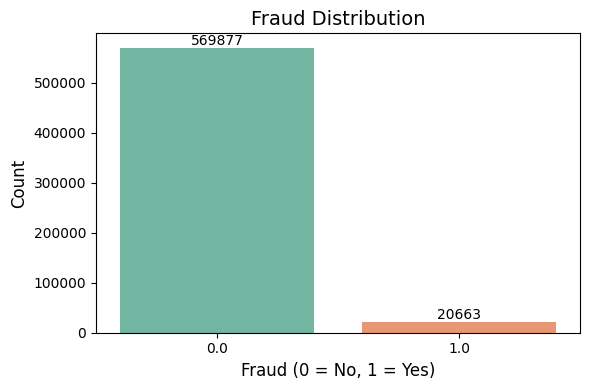

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='isFraud', hue='isFraud', palette='Set2', legend=False)
plt.title("Fraud Distribution", fontsize=14)
plt.xlabel("Fraud (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()


This plot visualizes the distribution of fraudulent vs. non-fraudulent transactions in the dataset using a countplot. It shows how many transactions are marked as **fraudulent (1) and non-fraudulent (0)**. The hue parameter differentiates the two categories with color, and value labels are added on top of the bars for easier interpretation. This chart helps us check for class imbalance, which could impact model performance. If the data is imbalanced, techniques like resampling might be needed.

In [ ]:
skew_feats = ['TransactionAmt','dist1','dist2','D1','D2','D15']
# 5. — Prepare for Modeling
X = df.drop(columns=['isFraud','Transaction_Date','TransactionDT'])
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print("Skewness (kept raw):\n", df[skew_feats].skew().sort_values(ascending=False))

Skewness (kept raw):
 dist2             23.336006
TransactionAmt    14.374488
dist1              8.225428
D2                 1.966702
D1                 1.808689
D15                1.206670
dtype: float32


This part of the code prepares the dataset for modeling. I defined the skewed features (skew_feats) like **TransactionAmt, dist1, dist2, D1, D2**, **and D15**, which have **high skewness**. Instead of applying log transformations to these features, I decided to keep the original skewness in the data. The dataset is then split into training and test sets with stratification to maintain class distribution. Finally, the skewness values for these features are printed to show their impact on the data.

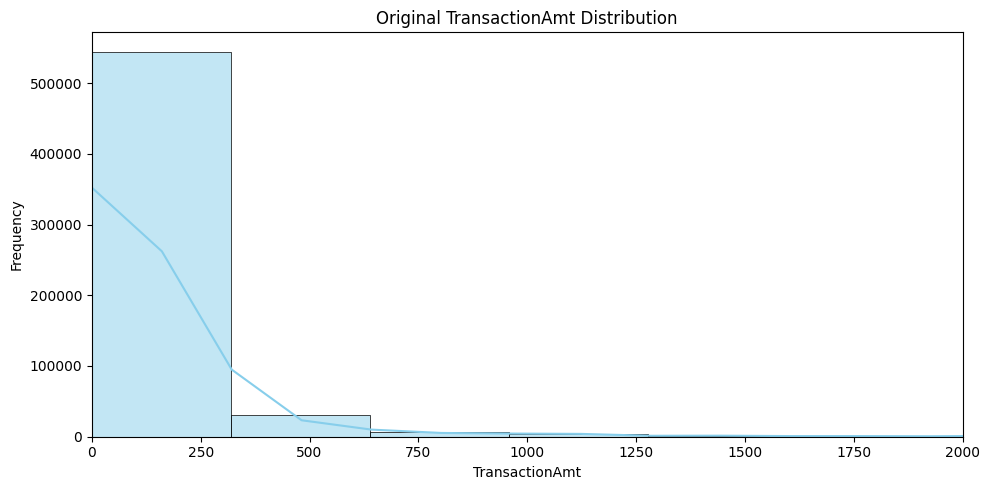

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot original TransactionAmt with better binning and axis limits
sns.histplot(df['TransactionAmt'].dropna(), bins=100, kde=True, color='skyblue')

plt.title('Original TransactionAmt Distribution')
plt.xlabel('TransactionAmt')
plt.ylabel('Frequency')

# Optionally zoom into a more informative range
plt.xlim(0, 2000)  # Adjust upper limit if most values are below this

plt.tight_layout()
plt.show()


This code visualizes the distribution of the TransactionAmt feature. We can see that the distribution is right-skewed. I used Seaborn's histplot to create a histogram with **100 bins and a Kernel Density Estimate (KDE)** to show the smooth distribution of the data. I also zoomed in on the range of 0 to 2000, as most of the transaction amounts are below this threshold, which helps in better understanding the distribution. This visualization is useful for identifying patterns or anomalies in the transaction amounts, and it also allows me to understand the skewness of the feature before proceeding with model training.

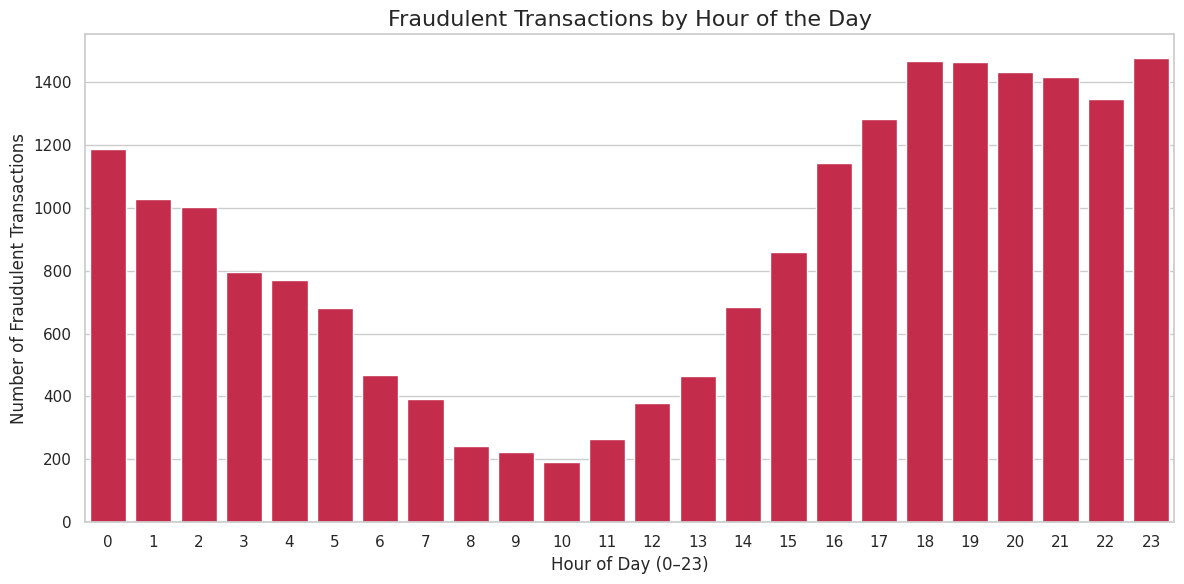

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rebuild the Transaction_Date and Hour column if needed
REFERENCE_DATE = pd.to_datetime('2017-12-01')
df_transactions['Transaction_Date'] = (
    pd.to_timedelta(df_transactions['TransactionDT'], unit='s')
    + REFERENCE_DATE
)
df_transactions['Hour'] = df_transactions['Transaction_Date'].dt.hour

# Filter to include only fraud transactions
fraud_only = df_transactions[df_transactions['isFraud'] == 1]

# Plot fraud transactions by hour
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=fraud_only, x='Hour', color='crimson')

plt.title('Fraudulent Transactions by Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)

plt.tight_layout()
plt.show()


This plot provides an overview of when fraudulent transactions occur throughout the day. From the chart, I observed that fraud is more concentrated during certain hours. Specifically, the majority of fraud occurs in the early hours of the morning, suggesting that **fraudulent activities may be driven by global or opportunistic behavior, perhaps related to time zones or reduced monitoring during off-hours**. This pattern can be useful for identifying high-risk periods and adjusting fraud detection systems accordingly. By analyzing the fraud distribution by hour, I can prioritize real-time monitoring during peak hours and focus efforts on improving system vigilance during these periods.

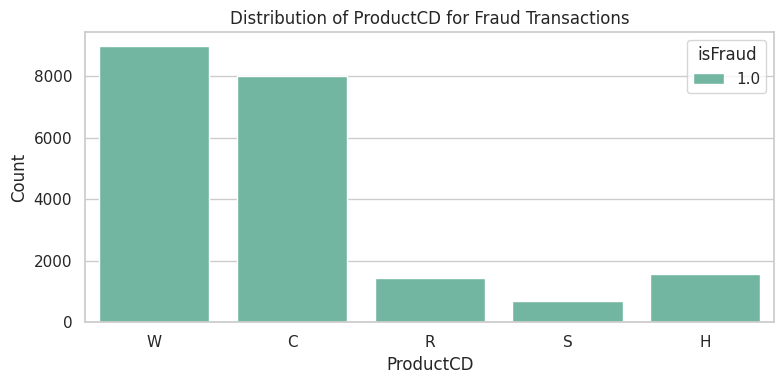

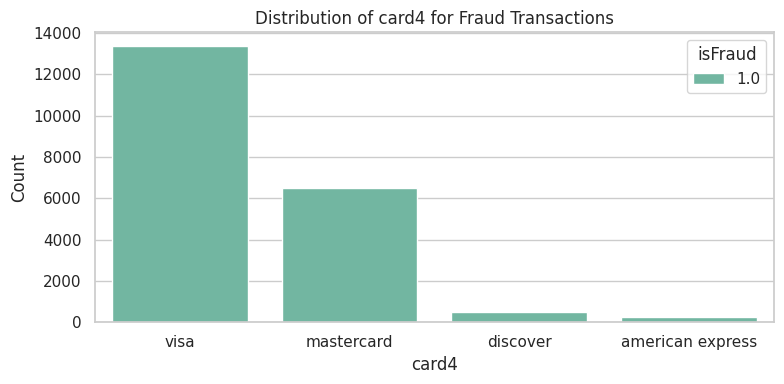

In [ ]:
categorical_features = ['ProductCD', 'card4']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='isFraud', data=df[df['isFraud'] == 1], palette='Set2')
    plt.title(f'Distribution of {feature} for Fraud Transactions')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


After analyzing the distribution of various categorical features—such as **ProductCD and card4**—against the fraud status, I noticed that some specific categories are associated with higher fraud rates than others. This observation leads me to believe that certain products or card types could serve as valuable predictors in my fraud detection model. Recognizing these patterns not only informs my feature selection and engineering process but also suggests that integrating these categorical insights could enhance the model’s overall performance in flagging fraudulent transactions. This helps identify patterns or relationships between specific categories and fraudulent transactions, which is valuable for building a more targeted fraud detection model.

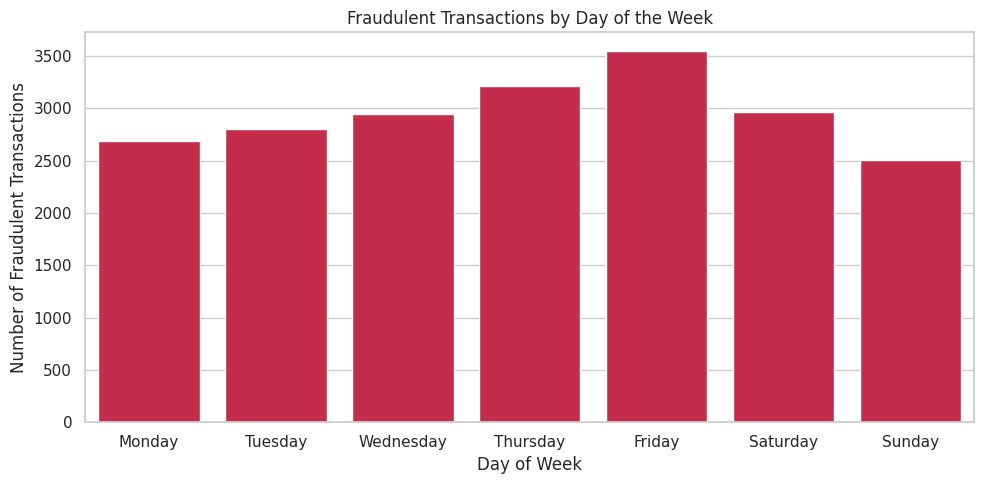

In [ ]:
# Convert to datetime and extract weekday if not already done
df['Transaction_date'] = pd.to_datetime(df['TransactionDT'], unit='s')
df['weekday'] = df['Transaction_date'].dt.day_name()

# Filter only fraud transactions
fraud_only = df[df['isFraud'] == 1]

# Plot fraud count by weekday
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='weekday', data=fraud_only, color='crimson', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.title('Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()


For this chart, I observed that Friday had the highest number of fraudulent transactions. This might suggest that fraudsters are more active toward the end of the week, possibly due to factors like end-of-week financial urgency or an increase in transaction volumes.

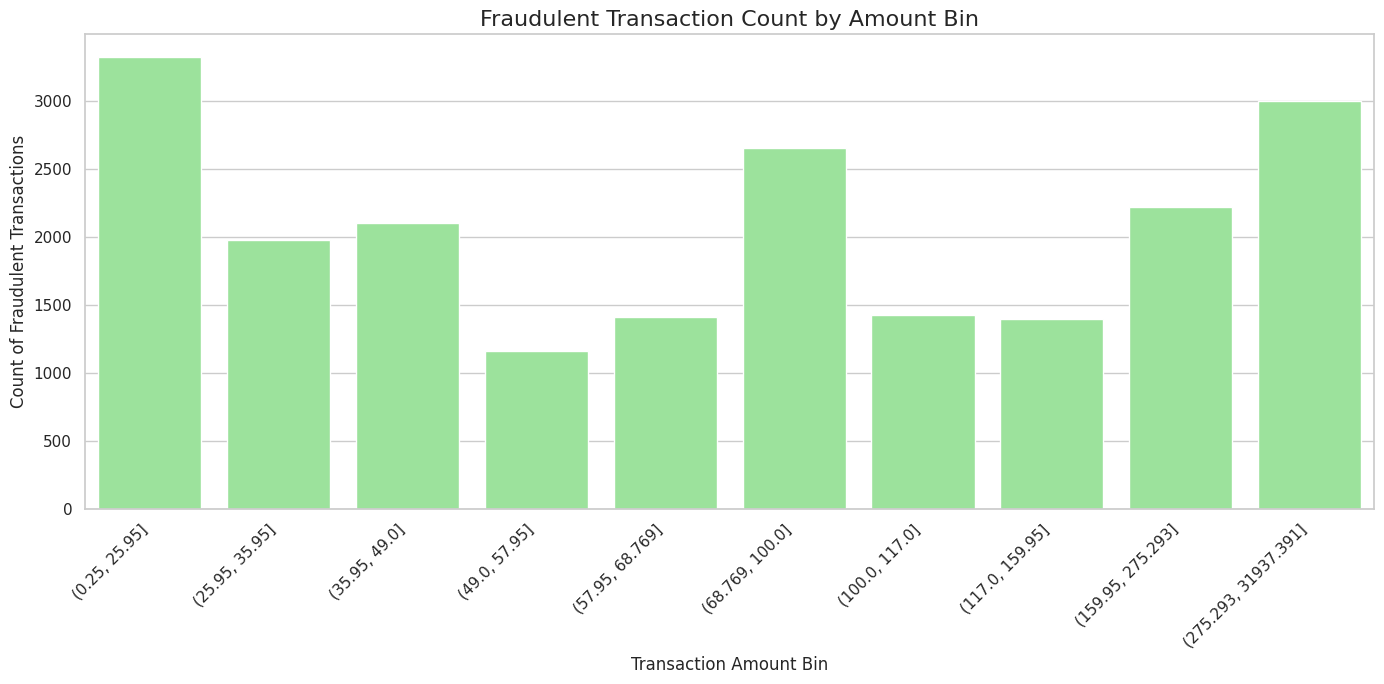

In [ ]:
# Create binned version of the TransactionAmt column
df_transactions['TransactionAmt_bin'] = pd.qcut(
    df_transactions['TransactionAmt'], q=10, duplicates='drop'
)

# Filter to include only fraud transactions
fraud_only = df_transactions[df_transactions['isFraud'] == 1]

# Plot only fraud transactions by TransactionAmt_bin
plt.figure(figsize=(14, 7))
sns.countplot(
    data=fraud_only,
    x='TransactionAmt_bin',
    color='lightgreen'
)

plt.title("Fraudulent Transaction Count by Amount Bin", fontsize=16)
plt.xlabel("Transaction Amount Bin", fontsize=12)
plt.ylabel("Count of Fraudulent Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The fraud rate analysis by transaction amount bins reveals some interesting trends. It is evident that the fraud rate is not evenly distributed across all transaction amounts. The highest fraud rates tend to occur in the lower and middle transaction amount ranges, with a noticeable peak in the bins ranging from 0.25(USD) to 25.95(USD). This suggests that **smaller transactions may be targeted more frequently for fraudulent activity, possibly due to lower detection mechanisms or less scrutiny**. On the other hand, larger transactions, while still exhibiting a significant fraud rate, seem to be less prone to fraud relative to their size. This could indicate more robust security measures in place for high-value transactions, or fraudsters may be opting to conduct smaller, more frequent fraudulent transactions to avoid detection.

These findings could be valuable for building more effective fraud detection models, as they highlight the importance of considering transaction amount as a key feature. Further analysis could delve deeper into the behavior of fraudulent transactions within each bin to identify additional patterns or vulnerabilities.

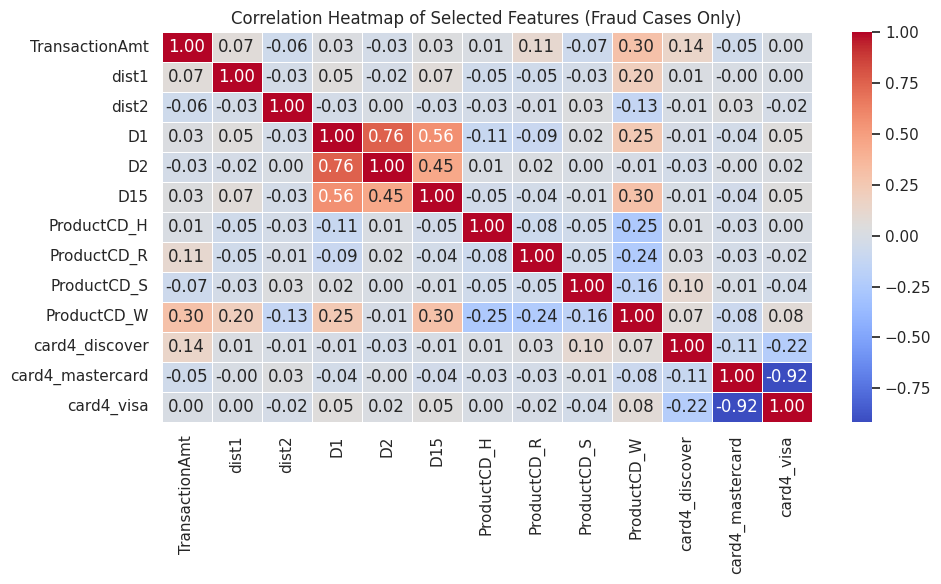

In [ ]:
# Step 1: Filter only fraud cases
fraud_subset_df = df[df['isFraud'] == 1]

# Step 2: Focus on a smaller subset of numeric columns for correlation
numeric_columns = ['TransactionAmt', 'dist1', 'dist2', 'D1', 'D2', 'D15']  # Selected numeric columns

# Filter fraud subset and keep only these columns
fraud_subset_df_numeric = fraud_subset_df[numeric_columns]

# Step 3: One-hot encode a small subset of categorical columns (e.g., 'ProductCD', 'card4')
categorical_columns = ['ProductCD', 'card4']  # Subset of categorical columns to keep
fraud_subset_df_encoded = pd.get_dummies(fraud_subset_df[categorical_columns], drop_first=True)

# Step 4: Concatenate the numeric and encoded categorical columns
fraud_subset_df_final = pd.concat([fraud_subset_df_numeric, fraud_subset_df_encoded], axis=1)

# Step 5: Calculate the correlation matrix
corr_matrix = fraud_subset_df_final.corr()

# Step 6: Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features (Fraud Cases Only)")
plt.tight_layout()
plt.show()


To understand feature relationships specifically within fraud, I first filtered my dataset to include only fraudulent transactions (isFraud == 1). I then selected key numeric (TransactionAmt, dist1, D1, etc.) and categorical (ProductCD, card4) features. After one-hot encoding the categorical columns to make them numeric, I calculated the correlations between all these selected features for the fraud-only data.

Looking at the resulting heatmap, I could see some relationships specific to the fraud data. For example, I noted a fairly **strong positive correlation (0.76) between D1 and D2**, and a **moderate positive one (0.30) between TransactionAmt and D15** within these fraud cases. The **strong negative correlations between the different card types (like card4_visa vs card4_mastercard at -0.92)** were also clearly visible, which is logical since a single transaction usually involves only one card type.

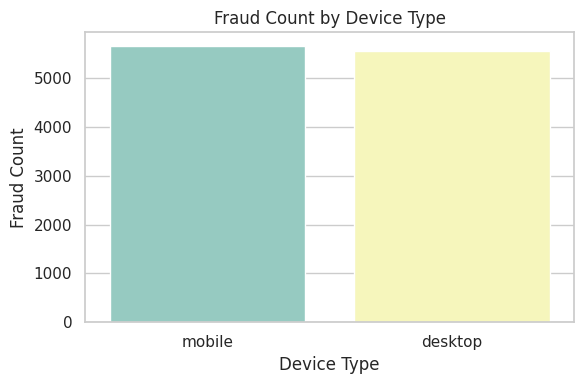

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=fraud_subset_df, x='DeviceType', hue='DeviceType', palette='Set3', legend=False)
plt.title("Fraud Count by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Fraud Count")
plt.tight_layout()
plt.show()


I examined the distribution of fraudulent transactions across device types. The plot shows that **mobile devices account for slightly more fraud cases than desktop devices**. This may suggest that fraudsters are increasingly targeting or operating through mobile environments — possibly because mobile usage is more common, or because some users have weaker security practices on mobile. On the other hand, the difference isn’t extreme, indicating that fraud occurs at a fairly high rate on both platforms, and **device type alone may not be a strong predictor** without additional context like user behavior, time of day, or location.

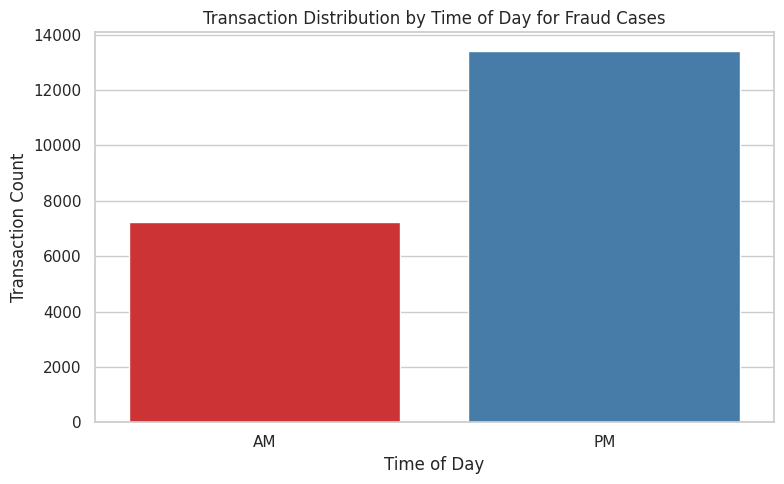

In [ ]:
# Use .loc[] to avoid SettingWithCopyWarning
fraud_subset_df.loc[:, 'TimeOfDay'] = fraud_subset_df['Hour'].apply(lambda x: 'AM' if x < 12 else 'PM')

# Plot the distribution of transactions by time of day
plt.figure(figsize=(8, 5))
sns.countplot(data=fraud_subset_df, x='TimeOfDay', hue='TimeOfDay', palette='Set1', legend=False)
plt.title('Transaction Distribution by Time of Day for Fraud Cases')
plt.xlabel('Time of Day')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()


The count plot showing fraudulent transactions split by "AM" and "PM" reveals some interesting trends about when fraud tends to happen. The x-axis represents whether the transaction took place in the "AM" or "PM" period, and the y-axis shows the count of fraudulent transactions.

From the plot, I can see that fraudulent transactions are **more common in the "PM" period** (afternoon and evening) compared to the "AM" period (morning). This suggests that **fraud tends to occur more frequently later in the day**.

This pattern could be useful for detecting fraud, as it might be worth focusing on the "PM" period when building or tuning fraud detection models. It could help improve the system's ability to catch fraud by prioritizing these timeframes.